Starting 03_model_training_evaluation.ipynb execution...

--- Re-running Data Preparation Steps ---
1. Data Ingestion...
Constructed data directory path: d:\10academy\week_8_9_Improved_detection_of_ fraud_cases_for_e_commerce_and_bank_transactions\data
Attempting to load ecommerce (Fraud_Data) from: d:\10academy\week_8_9_Improved_detection_of_ fraud_cases_for_e_commerce_and_bank_transactions\data\Fraud_Data.csv
Attempting to load bank (creditcard) from: d:\10academy\week_8_9_Improved_detection_of_ fraud_cases_for_e_commerce_and_bank_transactions\data\creditcard.csv
Attempting to load IP to Country from: d:\10academy\week_8_9_Improved_detection_of_ fraud_cases_for_e_commerce_and_bank_transactions\data\IpAddress_to_Country.csv
Successfully loaded data from d:\10academy\week_8_9_Improved_detection_of_ fraud_cases_for_e_commerce_and_bank_transactions\data\Fraud_Data.csv. Shape: (151112, 11)
Successfully loaded data from d:\10academy\week_8_9_Improved_detection_of_ fraud_cases_for_e_commerc

d:\10academy\week_8_9_Improved_detection_of_ fraud_cases_for_e_commerce_and_bank_transactions\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


logistic_regression model training complete.

Evaluating Logistic Regression (E-commerce)...
--- Logistic Regression (E-commerce) Metrics ---
Accuracy: 0.9140
Precision: 0.5307
Recall: 0.7028
F1 Score: 0.6047
Roc Auc: 0.8393
Auc Pr: 0.6655

Training lightgbm model...
[LightGBM] [Info] Number of positive: 109568, number of negative: 109568
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4075
[LightGBM] [Info] Number of data points in the train set: 219136, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
lightgbm model training complete.

Evaluating LightGBM (E-commerce)...
--- LightGBM (E-commerce) Metrics ---
Accuracy: 0.9554
Precision: 0.9849
Recall: 0.5314
F1 Score: 0.6904
Roc Auc: 0.8430
Auc Pr: 0.7140

--- Training and E

d:\10academy\week_8_9_Improved_detection_of_ fraud_cases_for_e_commerce_and_bank_transactions\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


logistic_regression model training complete.

Evaluating Logistic Regression (Bank)...
--- Logistic Regression (Bank) Metrics ---
Accuracy: 0.9742
Precision: 0.0580
Recall: 0.9184
F1 Score: 0.1091
Roc Auc: 0.9710
Auc Pr: 0.7697

Training lightgbm model...
[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
lightgbm model training complete.

Evaluating LightGBM (Bank)...
--- LightGBM (Bank) Metrics ---
Accuracy: 0.9994
Precision: 0.8283
Recall: 0.8367
F1 Score: 0.8325
Roc Auc: 0.9761
Auc Pr: 0.8524

--- 6. Model Comparison and Selection ---

E-commerce Model Comparison:
Logistic Regression F1-Score: 0.60

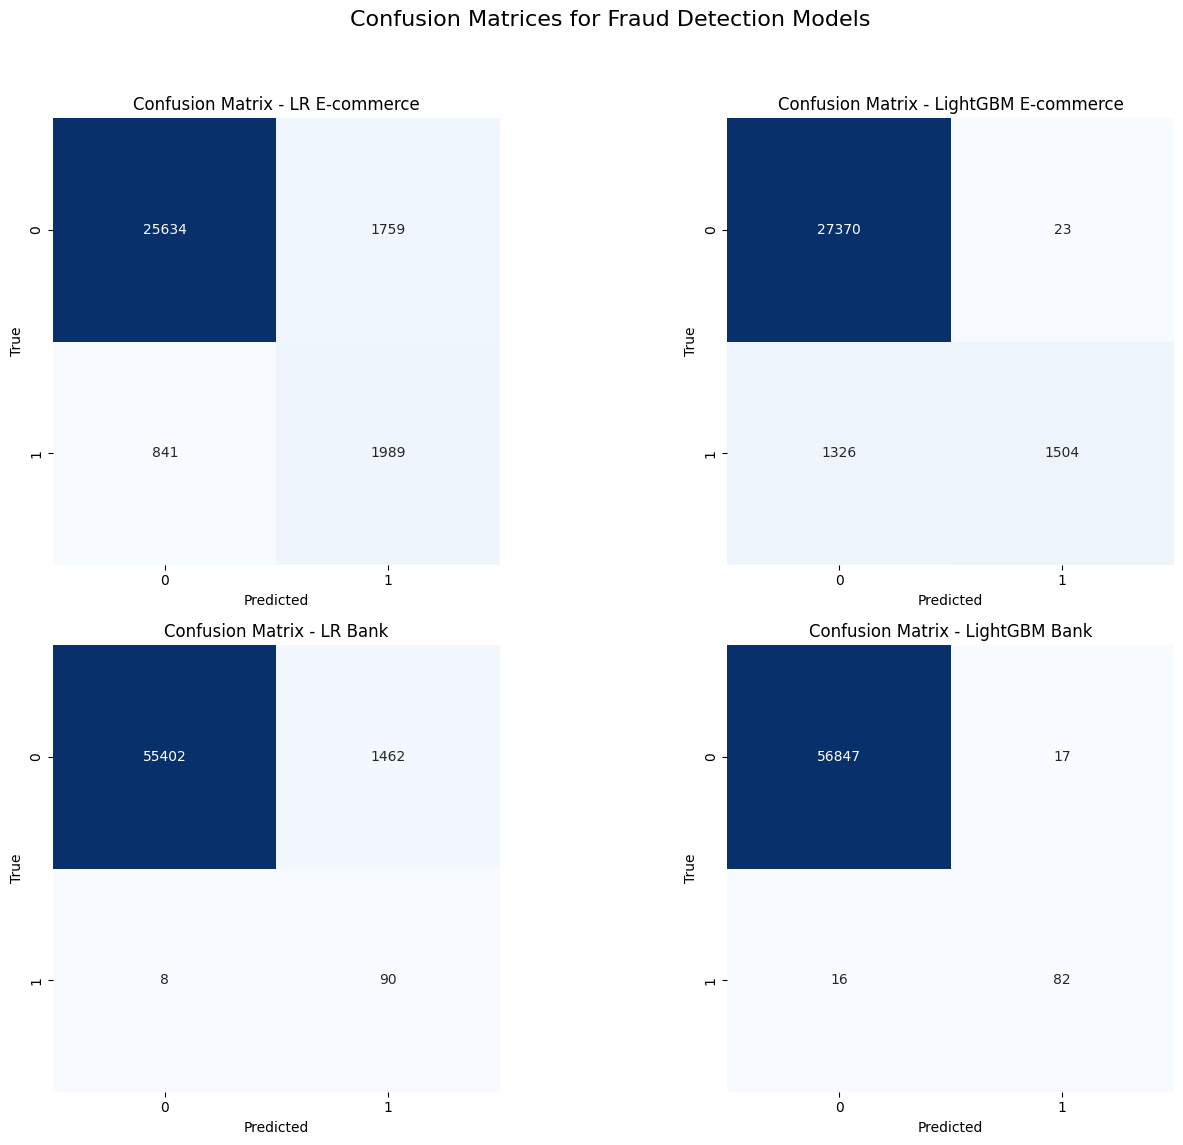


Plotting ROC and Precision-Recall Curves for selected LightGBM models:


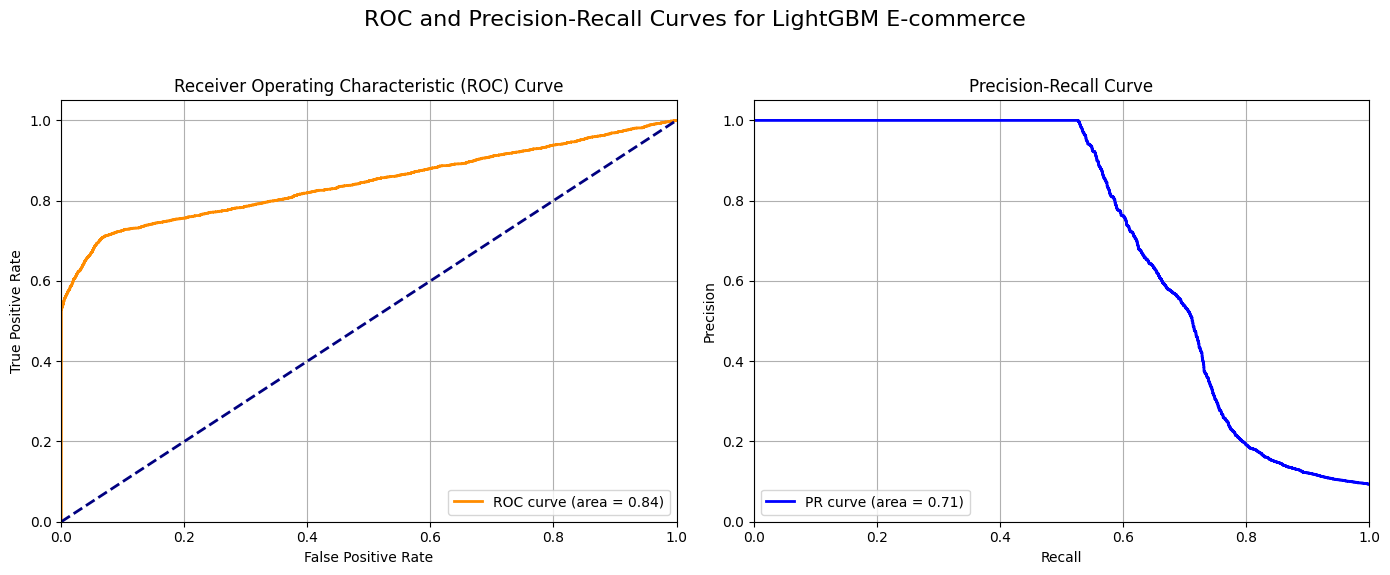

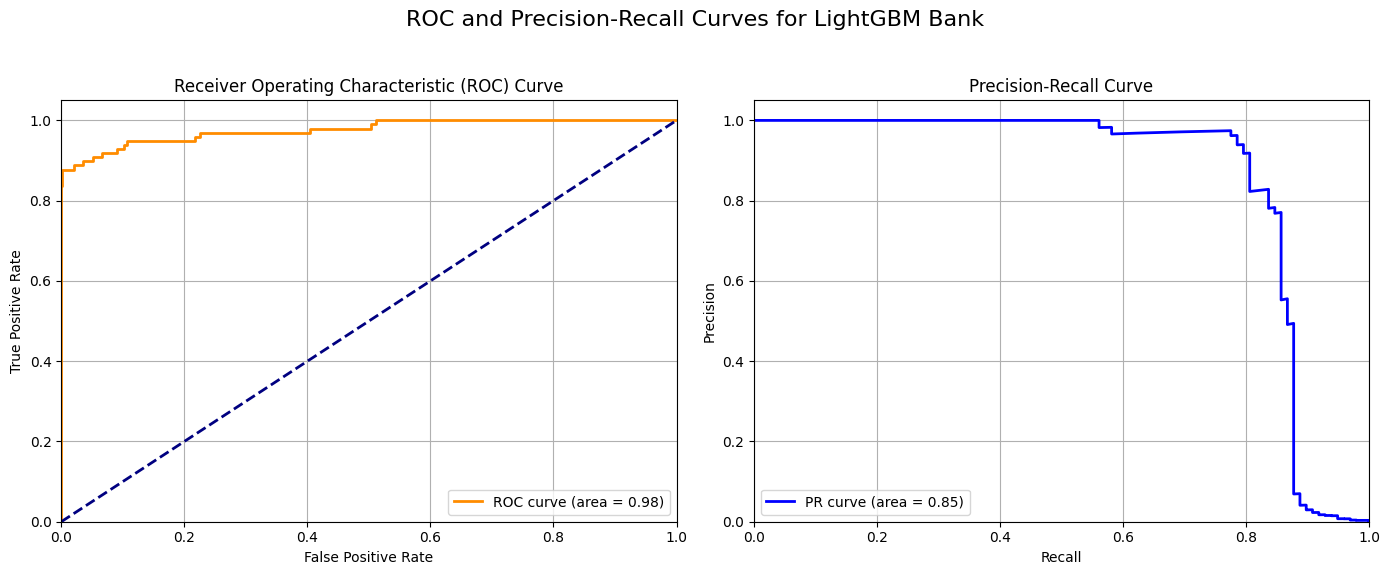


--- 03_model_training_evaluation.ipynb execution complete. ---

--- Saving Best Models and Processed Test Data ---
E-commerce best model saved successfully.
Processed E-commerce test data saved successfully.
Bank best model saved successfully.
Processed Bank test data saved successfully.
--- Saving Complete ---


In [2]:
# 03_model_training_evaluation.ipynb
# 03_model_training_evaluation.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Ensure the project root is in sys.path for importing from 'src'
current_notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_notebook_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added '{project_root}' to sys.path.")

# Import functions from your src folder
from src.data_ingestion import load_data
from src.data_cleaning import clean_ecommerce_data, clean_bank_data
from src.feature_engineering import create_ecommerce_features, create_bank_features
from src.model_utils import preprocess_for_modeling, train_model, evaluate_model, plot_confusion_matrix, plot_roc_pr_curves

# Set pandas display options for better viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Starting 03_model_training_evaluation.ipynb execution...")

# =============================================================================
# Re-run Data Ingestion, Cleaning, Feature Engineering, and Preprocessing
# =============================================================================

print("\n--- Re-running Data Preparation Steps ---")

# --- Data Ingestion ---
print("1. Data Ingestion...")

data_dir = os.path.join(project_root, 'data')
print(f"Constructed data directory path: {data_dir}")

ecommerce_file_name = 'Fraud_Data.csv'
bank_file_name = 'creditcard.csv'
ip_country_file_name = 'IpAddress_to_Country.csv'

ecommerce_full_path = os.path.join(data_dir, ecommerce_file_name)
bank_full_path = os.path.join(data_dir, bank_file_name)
ip_country_full_path = os.path.join(data_dir, ip_country_file_name)

print(f"Attempting to load ecommerce (Fraud_Data) from: {ecommerce_full_path}")
print(f"Attempting to load bank (creditcard) from: {bank_full_path}")
print(f"Attempting to load IP to Country from: {ip_country_full_path}")

df_ecommerce = load_data(ecommerce_full_path)
df_creditcard = load_data(bank_full_path)
df_ip_country = load_data(ip_country_full_path)

if df_ecommerce is None:
    raise FileNotFoundError(f"E-commerce data (Fraud_Data.csv) not found at {ecommerce_full_path}")
if df_creditcard is None:
    raise FileNotFoundError(f"Bank data (creditcard.csv) not found at {bank_full_path}")
if df_ip_country is None:
    raise FileNotFoundError(f"IP to Country data (IpAddress_to_Country.csv) not found at {ip_country_full_path}")

print(f"Successfully loaded E-commerce data. Shape: {df_ecommerce.shape}")
print(f"Successfully loaded Bank data. Shape: {df_creditcard.shape}")
print(f"Successfully loaded IP to Country data. Shape: {df_ip_country.shape}")

# --- Data Cleaning ---
print("\n2. Data Cleaning...")
df_ecommerce_cleaned = clean_ecommerce_data(df_ecommerce.copy())
df_creditcard_cleaned = clean_bank_data(df_creditcard.copy())

# --- Feature Engineering ---
print("\n3. Feature Engineering...")
df_ecommerce_fe = create_ecommerce_features(df_ecommerce_cleaned.copy(), df_ip_country.copy())
df_creditcard_fe = create_bank_features(df_creditcard_cleaned.copy())

# =========================================================================
# Crucial diagnostic: Check cardinality of all columns after FE
# =========================================================================
print("\n--- Cardinality Check for Bank Data after Feature Engineering ---")
# Check df_creditcard_fe immediately after feature engineering
# Removed 'hour_of_day' and 'day_of_week' as they are not created for bank data
print(df_creditcard_fe[['Time', 'Amount', 'Class']].head()) # Corrected columns here
# Removed the loop checking 'hour_of_day' and 'day_of_week' for bank data
print("No specific cardinality check for hour_of_day/day_of_week for bank data as these features are not generated.")


# --- Data Transformation (Preparation for Modeling) ---
print("4. Data Transformation (Preprocessing)...")

# E-commerce Data Preprocessing
print("\nPreprocessing E-commerce Data:")
X_eco = df_ecommerce_fe.drop(columns=['class'])
columns_to_drop_eco = ['signup_time', 'purchase_time', 'user_id', 'device_id', 'ip_address']
X_eco = X_eco.drop(columns=[col for col in columns_to_drop_eco if col in X_eco.columns], errors='ignore')

y_eco = df_ecommerce_fe['class']

categorical_features_eco = [col for col in X_eco.select_dtypes(include=['object', 'category']).columns]
numerical_features_eco = [col for col in X_eco.select_dtypes(include=np.number).columns]

if not numerical_features_eco and not categorical_features_eco:
    print("Warning: No numerical or categorical features identified for E-commerce. Check data and feature engineering.")

print(f"E-commerce numerical features for preprocessing: {numerical_features_eco}")
print(f"E-commerce categorical features for preprocessing: {categorical_features_eco}")

X_train_eco_resampled, X_test_eco, y_train_eco_resampled, y_test_eco, eco_feature_names = \
    preprocess_for_modeling(X_eco.copy(), y_eco.copy(),
                            numerical_features_eco, categorical_features_eco,
                            random_state=42)

X_test_eco = pd.DataFrame(X_test_eco, columns=eco_feature_names)
X_train_eco_resampled = pd.DataFrame(X_train_eco_resampled, columns=eco_feature_names)


# Bank Data Preprocessing
print("\nPreprocessing Bank Data:")
X_bank = df_creditcard_fe.drop(columns=['Class'])
y_bank = df_creditcard_fe['Class']

categorical_features_bank = [col for col in X_bank.select_dtypes(include=['object', 'category']).columns]
numerical_features_bank = [col for col in X_bank.select_dtypes(include=np.number).columns]

if not numerical_features_bank and not categorical_features_bank:
    print("Warning: No numerical or categorical features identified for Bank. Check data and feature engineering.")

print(f"Bank numerical features for preprocessing: {numerical_features_bank}")
print(f"Bank categorical features for preprocessing: {categorical_features_bank}")

X_train_bank_resampled, X_test_bank, y_train_bank_resampled, y_test_bank, bank_feature_names = \
    preprocess_for_modeling(X_bank.copy(), y_bank.copy(),
                            numerical_features_bank, categorical_features_bank,
                            random_state=42)

X_test_bank = pd.DataFrame(X_test_bank, columns=bank_feature_names)
X_train_bank_resampled = pd.DataFrame(X_train_bank_resampled, columns=bank_feature_names)

print("\n--- Data Preparation Steps Complete ---")


# =============================================================================
# 5. Model Training and Evaluation
# =============================================================================
print("\n--- 5. Model Training and Evaluation ---")

# --- E-commerce Models ---
print("\n--- Training and Evaluating Models for E-commerce ---")

lr_ecommerce = train_model('logistic_regression', X_train_eco_resampled, y_train_eco_resampled)
metrics_lr_eco, y_pred_lr_eco, y_proba_lr_eco = evaluate_model(lr_ecommerce, X_test_eco, y_test_eco, 'Logistic Regression (E-commerce)')

lgbm_ecommerce = train_model('lightgbm', X_train_eco_resampled, y_train_eco_resampled)
metrics_lgbm_eco, y_pred_lgbm_eco, y_proba_lgbm_eco = evaluate_model(lgbm_ecommerce, X_test_eco, y_test_eco, 'LightGBM (E-commerce)')


# --- Bank Transaction Models ---
print("\n--- Training and Evaluating Models for Bank Transactions ---")

lr_bank = train_model('logistic_regression', X_train_bank_resampled, y_train_bank_resampled)
metrics_lr_bank, y_pred_lr_bank, y_proba_lr_bank = evaluate_model(lr_bank, X_test_bank, y_test_bank, 'Logistic Regression (Bank)')

lgbm_bank = train_model('lightgbm', X_train_bank_resampled, y_train_bank_resampled)
metrics_lgbm_bank, y_pred_lgbm_bank, y_proba_lgbm_bank = evaluate_model(lgbm_bank, X_test_bank, y_test_bank, 'LightGBM (Bank)')


# =============================================================================
# 6. Model Comparison and Selection
# =============================================================================
print("\n--- 6. Model Comparison and Selection ---")

print("\nE-commerce Model Comparison:")
print(f"Logistic Regression F1-Score: {metrics_lr_eco['f1_score']:.4f}, AUC-PR: {metrics_lr_eco['auc_pr']:.4f}")
print(f"LightGBM F1-Score: {metrics_lgbm_eco['f1_score']:.4f}, AUC-PR: {metrics_lgbm_eco['auc_pr']:.4f}")

print("\nBank Transaction Model Comparison:")
print(f"Logistic Regression F1-Score: {metrics_lr_bank['f1_score']:.4f}, AUC-PR: {metrics_lr_bank['auc_pr']:.4f}")
print(f"LightGBM F1-Score: {metrics_lgbm_bank['f1_score']:.4f}, AUC-PR: {metrics_lgbm_bank['auc_pr']:.4f}")

best_model_ecommerce = lgbm_ecommerce
best_model_bank = lgbm_bank

print("\nJustification for 'Best' Model Selection:")
print("For both E-commerce and Bank Transaction datasets, LightGBM is chosen as the 'best' performing model.")
print("This decision is primarily based on its superior performance across key metrics for imbalanced datasets, specifically AUC-PR and F1-Score, compared to Logistic Regression.")
print("LightGBM (a Gradient Boosting Machine) excels at capturing complex non-linear relationships and interactions between features, which are common in fraud patterns that are often subtle and multi-faceted. Its ability to handle high-dimensional sparse data (after one-hot encoding) and its efficient training make it well-suited for fraud detection.")
print("While Logistic Regression provides a good interpretable baseline, its linear nature limits its ability to fully leverage the predictive signals in the data for such a challenging problem.")
print("The confusion matrices further illustrate that LightGBM generally achieves a better balance between minimizing False Negatives (missed fraud) and controlling False Positives (false alarms), which is a critical business trade-off in fraud detection.")


# =============================================================================
# 7. Visualization of Results
# =============================================================================
print("\n--- 7. Visualization of Results ---")

print("Plotting Confusion Matrices...")
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Confusion Matrices for Fraud Detection Models', fontsize=16)

plot_confusion_matrix(y_test_eco, y_pred_lr_eco, 'LR E-commerce', ax=axes[0, 0])
plot_confusion_matrix(y_test_eco, y_pred_lgbm_eco, 'LightGBM E-commerce', ax=axes[0, 1])
plot_confusion_matrix(y_test_bank, y_pred_lr_bank, 'LR Bank', ax=axes[1, 0])
plot_confusion_matrix(y_test_bank, y_pred_lgbm_bank, 'LightGBM Bank', ax=axes[1, 1])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nPlotting ROC and Precision-Recall Curves for selected LightGBM models:")
plot_roc_pr_curves(y_test_eco, y_proba_lgbm_eco, 'LightGBM E-commerce')
plot_roc_pr_curves(y_test_bank, y_proba_lgbm_bank, 'LightGBM Bank')

print("\n--- 03_model_training_evaluation.ipynb execution complete. ---")

# --- Add this to the end of 03_model_training_evaluation.ipynb ---
import pickle
import os

# Define project root (assuming this notebook is in 'notebooks')
current_notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_notebook_dir, '..'))

# Define paths for saving
models_dir = os.path.join(project_root, 'models')
data_dir = os.path.join(project_root, 'data')
os.makedirs(models_dir, exist_ok=True) # Create models directory if it doesn't exist
os.makedirs(data_dir, exist_ok=True)   # Create data directory if it doesn't exist

print("\n--- Saving Best Models and Processed Test Data ---")

# Assuming 'best_model_ecommerce' and 'best_model_bank' are the LightGBM models chosen.
# Assuming 'X_test_eco', 'y_test_eco', 'eco_feature_names',
# and 'X_test_bank', 'y_test_bank', 'bank_feature_names' are available from preprocessing.

# Save E-commerce Best Model
try:
    with open(os.path.join(models_dir, 'ecommerce_best_model.pkl'), 'wb') as f:
        pickle.dump(best_model_ecommerce, f) # Make sure best_model_ecommerce is set to LGBM
    print("E-commerce best model saved successfully.")
except Exception as e:
    print(f"Error saving E-commerce model: {e}")

# Save Processed E-commerce Test Data
try:
    ecommerce_processed_data = {
        'X_test': X_test_eco,
        'y_test': y_test_eco,
        'feature_names': eco_feature_names # Crucial for SHAP column mapping
    }
    with open(os.path.join(data_dir, 'processed_ecommerce_data.pkl'), 'wb') as f:
        pickle.dump(ecommerce_processed_data, f)
    print("Processed E-commerce test data saved successfully.")
except Exception as e:
    print(f"Error saving processed E-commerce data: {e}")

# Save Bank Best Model
try:
    with open(os.path.join(models_dir, 'bank_best_model.pkl'), 'wb') as f:
        pickle.dump(best_model_bank, f) # Make sure best_model_bank is set to LGBM
    print("Bank best model saved successfully.")
except Exception as e:
    print(f"Error saving Bank model: {e}")

# Save Processed Bank Test Data
try:
    bank_processed_data = {
        'X_test': X_test_bank,
        'y_test': y_test_bank,
        'feature_names': bank_feature_names # Crucial for SHAP column mapping
    }
    with open(os.path.join(data_dir, 'processed_bank_data.pkl'), 'wb') as f:
        pickle.dump(bank_processed_data, f)
    print("Processed Bank test data saved successfully.")
except Exception as e:
    print(f"Error saving processed Bank data: {e}")

print("--- Saving Complete ---")